## Rookie of The Year, No Pitchers Allowed
### Retroactively awarding the Rookie of The Year to standout batters snubbed

#### Authored by Ben Mescher, for submission "P2-Investigate a Dataset" as part of Udacity's Data Analyst Nanodegree program

##### Submission History: 
*2015-Dec-24: Initial Udacity submit and upload to GitHub (https://github.com/benmesch/DataAnalysis.git)

##### Intro:
At the close of each season, writers(?) award the Rookie of The Year award to a single first year (exactly?) Major League baseball player. The honor has been awarded since 1947 [insert factoid about the inception of the award.] insert peculiarity of both pitchers and batters/fielders being eligible for the award. The following analysis asks the question: for the years in which a pitcher was named Rookie of The Year, were there any stand out rookies who might have otherwise been named the Rookie of the Year?

We will only look at batting statistics for rookies, not fielding. Explain how we distinguish hitting pitchers.

We will compare rookie batting raw numbers, how much of their team's share of batting they contributed, and how well their team did compared to the rest of the league. Then we will try to find similar rookie seasons in years where a pitcher ended up winning the award.

The dataset used for this analysis is the 2014 Lahman Baseball Database (http://seanlahman.com/files/database/readme2014.txt), a Creative Commons licensed collection of various baseball statistics from the 1871 to 2014 seasons in the Major Leagues. From the 2014 readme on the design of the Lahman database:

``` 
The database is comprised of the following main tables:

  MASTER - Player names, DOB, and biographical info
  Batting - batting statistics
  Pitching - pitching statistics
  Fielding - fielding statistics

It is supplemented by these tables:

  AllStarFull - All-Star appearances
  HallofFame - Hall of Fame voting data
  Managers - managerial statistics
  Teams - yearly stats and standings 
  BattingPost - post-season batting statistics
  PitchingPost - post-season pitching statistics
  TeamFranchises - franchise information
  FieldingOF - outfield position data  
  FieldingPost- post-season fieldinf data
  ManagersHalf - split season data for managers
  TeamsHalf - split season data for teams
  Salaries - player salary data
  SeriesPost - post-season series information
  AwardsManagers - awards won by managers 
  AwardsPlayers - awards won by players
  AwardsShareManagers - award voting for manager awards
  AwardsSharePlayers - award voting for player awards
  Appearances - details on the positions a player appeared at
  Schools - list of colleges that players attended
  CollegePlaying - list of players and the colleges they attended
```
  
We begin by importing the libraries and doing a bit of housecleaning for plots.

In [1]:
%pylab inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)


Populating the interactive namespace from numpy and matplotlib


/Users/ben/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([ 1.,  2.,  3.,  3.,  2.,  1.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

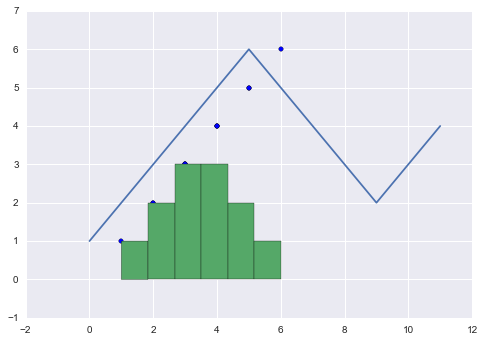

In [2]:
x = np.array([1,2,3,4,5,6,5,4,3,2,3,4])
plt.plot(x)
plt.scatter(x,x)
plt.hist(x,bins=6)

In [4]:
dfMaster = pd.read_csv('MASTER.csv')
dfMaster.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205,75,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180,72,R,R,4/13/1954,10/3/1976,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,Aaron,Tommie Lee,190,75,R,R,4/10/1962,9/26/1971,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190,75,R,R,7/26/1977,10/3/1990,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184,73,L,L,9/10/2001,4/13/2006,abada001,abadan01


In [5]:
dfBatting = pd.read_csv('Batting.csv')
dfBatting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19,3,1,2,5,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27,1,1,0,2,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16,6,2,2,1,NaN,NaN,NaN,NaN,NaN


In [6]:
dfMaster.loc[dfMaster['nameLast'].isin(['Jeter'])]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
8232,jeterde01,1974,6,26,USA,NJ,Pequannock,NaN,NaN,NaN,...,Jeter,Derek Sanderson,195,75,R,R,5/29/1995,9/28/2014,jeted001,jeterde01
8233,jeterjo01,1944,10,24,USA,LA,Shreveport,NaN,NaN,NaN,...,Jeter,John,180,73,R,R,6/14/1969,9/14/1974,jetej101,jeterjo01
8234,jetersh01,1966,6,28,USA,LA,Shreveport,NaN,NaN,NaN,...,Jeter,Shawn Darrell,185,74,L,R,6/13/1992,10/4/1992,jetes001,jetersh01


In [7]:
dfBatting.loc[dfBatting['playerID']=='jeterde01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
73448,jeterde01,1995,1,NYA,AL,15,48,5,12,4,...,7,0,0,3,11,0,0,0,0,0
74694,jeterde01,1996,1,NYA,AL,157,582,104,183,25,...,78,14,7,48,102,1,9,6,9,13
75946,jeterde01,1997,1,NYA,AL,159,654,116,190,31,...,70,23,12,74,125,0,10,8,2,14
77194,jeterde01,1998,1,NYA,AL,149,626,127,203,25,...,84,30,6,57,119,1,5,3,3,13
78523,jeterde01,1999,1,NYA,AL,158,627,134,219,37,...,102,19,8,91,116,5,12,3,6,12
79831,jeterde01,2000,1,NYA,AL,148,593,119,201,31,...,73,22,4,68,99,4,12,3,3,14
81203,jeterde01,2001,1,NYA,AL,150,614,110,191,35,...,74,27,3,56,99,3,10,5,1,13
82536,jeterde01,2002,1,NYA,AL,157,644,124,191,26,...,75,32,3,73,114,2,7,3,3,14
83864,jeterde01,2003,1,NYA,AL,119,482,87,156,25,...,52,11,5,43,88,2,13,3,1,10
85268,jeterde01,2004,1,NYA,AL,154,643,111,188,44,...,78,23,4,46,99,1,14,16,2,19


In [15]:
dfAwardsPlayers = pd.read_csv('AwardsPlayers.csv')
#test using ~df['col'].isin([target values]) like the SQL "not in..."
dfAwardsPlayers.loc[~dfAwardsPlayers['awardID'].isin(['Gold Glove','TSN All-Star','Babe Ruth Award','Silver Slugger','Hutch Award','Rookie of the Year'])].head(5)

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [4]:
dfRookieWin = dfAwardsPlayers.loc[dfAwardsPlayers['awardID'] == 'Rookie of the Year'][['playerID','yearID']]
#the first two ROTY were awarded with lgID='ML' because only one was given. later years had two: one for AL one for NL
dfRookieWin.count()

NameError: name 'dfAwardsPlayers' is not defined

In [98]:
dfRookieWinMaster = dfMaster.loc[dfMaster['playerID'].isin(dfRookieWin['playerID'])][['playerID','nameFirst','nameLast','nameGiven','debut','finalGame','birthYear','birthMonth','birthDay','birthCountry','weight','height','bats','throws']]
#dfRookieWinMaster.count()
dfRookieWin = dfRookieWin.merge(dfRookieWinMaster,how='inner',on=['playerID'])
dfRookieWin

,playerID,yearID,nameFirst,nameLast,nameGiven,debut,finalGame,birthYear,birthMonth,birthDay,birthCountry,weight,height,bats,throws
0,robinja02,1947,Jackie,Robinson,Jack Roosevelt,4/15/1947,9/30/1956,1919,1,31,USA,195,71,R,R
1,darkal01,1948,Al,Dark,Alvin Ralph,7/14/1946,10/2/1960,1922,1,7,USA,185,71,R,R
2,sievero01,1949,Roy,Sievers,Roy Edward,4/21/1949,5/9/1965,1926,11,18,USA,195,73,R,R
3,newcodo01,1949,Don,Newcombe,Donald,5/20/1949,10/1/1960,1926,6,14,USA,220,76,L,R
4,dropowa01,1950,Walt,Dropo,Walter,4/19/1949,5/17/1961,1923,1,30,USA,220,77,R,R
5,jethrsa01,1950,Sam,Jethroe,Samuel,4/18/1950,4/15/1954,1917,1,23,USA,178,73,B,R
6,mcdougi01,1951,Gil,McDougald,Gilbert James,4/20/1951,10/2/1960,1928,5,19,USA,175,72,R,R
7,mayswi01,1951,Willie,Mays,Willie Howard,5/25/1951,9/9/1973,1931,5,6,USA,170,70,R,R
8,byrdha01,1952,Harry,Byrd,Harry Gladwin,4/21/1950,9/27/1957,1925,2,3,USA,188,73,R,R
9,blackjo02,1952,Joe,Black,Joseph,5/1/1952,9/11/1957,1924,2,8,USA,220,74,R,R


In [101]:
dfRookieWinBatting = dfRookieWin.merge(dfBatting,how='inner',on=['playerID','yearID'])
print dfRookieWinBatting.count()
dfRookieWinBatting = dfRookieWinBatting[['playerID','yearID','lgID','nameFirst','nameLast','debut','G','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','GIDP']]
dfRookieWinBatting

playerID        136
yearID          136
nameFirst       136
nameLast        136
nameGiven       136
debut           136
finalGame       136
birthYear       136
birthMonth      136
birthDay        136
birthCountry    136
weight          136
height          136
bats            136
throws          136
stint           136
teamID          136
lgID            136
G               136
AB              134
R               134
H               134
2B              134
3B              134
HR              134
RBI             134
SB              134
CS              130
BB              134
SO              134
IBB             120
HBP             134
SH              134
SF              122
GIDP            134
dtype: int64


,playerID,yearID,lgID,nameFirst,nameLast,debut,G,AB,R,H,...,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP
0,robinja02,1947,NL,Jackie,Robinson,4/15/1947,151,590,125,175,...,5,12,48,29,NaN,74,36,NaN,9,5
1,darkal01,1948,NL,Al,Dark,7/14/1946,137,543,85,175,...,6,3,48,4,NaN,24,36,NaN,2,4
2,sievero01,1949,AL,Roy,Sievers,4/21/1949,140,471,84,144,...,1,16,91,1,5,70,75,NaN,2,15
3,newcodo01,1949,NL,Don,Newcombe,5/20/1949,39,96,8,22,...,0,0,10,0,NaN,5,16,NaN,0,4
4,dropowa01,1950,AL,Walt,Dropo,4/19/1949,136,559,101,180,...,8,34,144,0,0,45,75,NaN,5,16
5,jethrsa01,1950,NL,Sam,Jethroe,4/18/1950,141,582,100,159,...,8,18,58,35,NaN,52,93,NaN,5,8
6,mcdougi01,1951,AL,Gil,McDougald,4/20/1951,131,402,72,123,...,4,14,63,14,5,56,54,NaN,4,12
7,mayswi01,1951,NL,Willie,Mays,5/25/1951,121,464,59,127,...,5,20,68,7,4,57,60,NaN,2,11
8,byrdha01,1952,AL,Harry,Byrd,4/21/1950,37,75,4,10,...,0,0,2,0,0,3,21,NaN,0,0
9,blackjo02,1952,NL,Joe,Black,5/1/1952,57,36,1,5,...,0,0,5,0,0,0,15,NaN,0,1


Plotting the number of at bats and games played over all ROTY-winning seasons, we see many peaks and valleys in the data: these represent the vast differences in batting production between rookie pitchers and rookie batters:

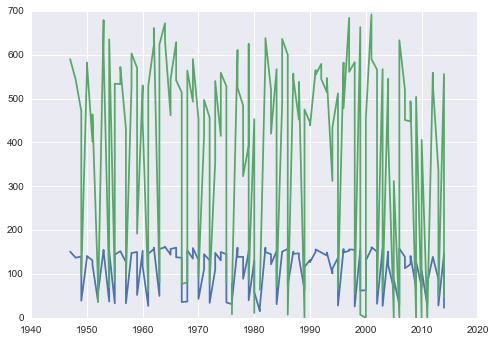

In [102]:
#dfRookieWinBatting[['G','AB']].plot(y=dfRookieWinBatting['yearID'])
plt.plot(dfRookieWinBatting['yearID'],dfRookieWinBatting[['G','AB']])

This analysis is based on this premise: in those pitcher-winning ROTY seasons (the 'valleys' in the plot above), were there any stand out rookie batters who might have otherwise taken home that year's ROTY, had a pitcher not ultimately been named for the award?

Just so you don't think I am 100% anti-pitcher, here are the 37 ROTY winners who pitched at some point in their award winning season. I include their batting numbers to illustrate that some of the winners (especially earlier in the award's history) did step up to the plate a time or to. 

In [103]:
dfPitching = pd.read_csv('Pitching.csv')
dfRookiePitching = dfRookieWin.merge(dfPitching,how='inner',on=['playerID','yearID'])
#print dfRookiePitching.count()
dfRookiePitching=dfRookiePitching[['playerID','teamID','yearID','lgID','W','L','G','GS','CG','SV','SHO','ER','BAOpp','SO','H','HR','BB','R','BFP']]
dfRookiePitching

,playerID,teamID,yearID,lgID,W,L,G,GS,CG,SV,SHO,ER,BAOpp,SO,H,HR,BB,R,BFP
0,newcodo01,BRO,1949,NL,17,8,38,31,19,1,5,86,0.240,149,223,17,73,89,1005
1,byrdha01,PHA,1952,AL,15,15,37,28,15,2,3,84,0.270,116,244,12,98,100,1008
2,blackjo02,BRO,1952,NL,15,4,56,2,1,15,0,34,0.200,85,102,9,41,40,560
3,grimbo01,NYA,1954,AL,20,6,37,20,8,0,1,72,0.240,108,175,9,85,78,825
4,scorehe01,CLE,1955,AL,16,10,33,32,11,0,2,72,0.190,245,158,18,154,85,978
5,sanfoja02,PHI,1957,NL,19,8,33,33,15,0,3,81,0.220,188,194,22,94,94,989
6,schwado01,BOS,1961,AL,15,7,25,25,10,0,2,64,0.250,91,167,8,110,76,786
7,peterga01,CHA,1963,AL,19,8,41,30,13,1,4,63,0.210,189,192,9,68,69,978
8,seaveto01,NYN,1967,NL,16,13,35,34,18,0,2,77,0.240,170,224,19,78,85,1029
9,bahnsst01,NYA,1968,AL,17,12,37,34,10,0,1,61,0.220,162,216,14,68,72,1070


Here are the ROTY pitchers' batting numbers. 

In [3]:
df = dfRookiePitching[['playerID','teamID','yearID','W','L','G','GS','SV','BAOpp','SO']].merge(dfRookieWinBatting,how='inner',on=['playerID','yearID'])

df['ba'] = df['H'] / df['AB']
df[['teamID','yearID','W','L','G_x','GS','SV','BAOpp','SO_x','nameFirst','nameLast','G_y','AB','R','ba']].sort_values('ba',ascending=False)

NameError: name 'dfRookiePitching' is not defined

Some pitcher ROTY even held their own, playing out in the field on occasion during their breakout years:

In [124]:
dfRookieWinAppearances = pd.read_csv('Appearances.csv')
dfRookieWinAppearances = dfRookiePitching[['playerID','teamID','yearID','W','L','G','GS','SV','BAOpp','SO']].merge(dfRookieWinAppearances[['playerID','yearID','G_all','G_batting','G_defense','G_p','G_ph']],how='inner',on=['playerID','yearID'])
dfRookieWinAppearances.loc[dfRookieWinAppearances['G_all']<>dfRookieWinAppearances['G_p']]

,playerID,teamID,yearID,W,L,G,GS,SV,BAOpp,SO,G_all,G_batting,G_defense,G_p,G_ph
0,newcodo01,BRO,1949,17,8,38,31,1,0.240,149,39,39,39,38,NaN
2,blackjo02,BRO,1952,15,4,56,2,15,0.200,85,57,57,57,56,NaN
6,schwado01,BOS,1961,15,7,25,25,0,0.250,91,27,27,27,25,NaN
7,peterga01,CHA,1963,19,8,41,30,1,0.210,189,50,50,50,41,NaN
8,seaveto01,NYN,1967,16,13,35,34,0,0.240,170,36,36,36,35,NaN
16,sutclri01,LAN,1979,17,10,39,30,0,0.240,117,40,40,39,39,1
36,degroja01,NYN,2014,9,6,22,22,0,0.228,144,23,22,22,22,1


In [125]:
df.loc[df['G_x']<>df['G_y']]

,playerID,teamID,yearID,W,L,G_x,GS,SV,BAOpp,SO_x,lgID,nameFirst,nameLast,debut,G_y,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO_y,IBB,HBP,GIDP
0,newcodo01,BRO,1949,17,8,38,31,1,0.240,149,NL,Don,Newcombe,5/20/1949,39,96,8,22,4,0,0,10,0,NaN,5,16,NaN,0,4
1,byrdha01,PHA,1952,15,15,37,28,2,0.270,116,AL,Harry,Byrd,4/21/1950,37,75,4,10,2,0,0,2,0,0,3,21,NaN,0,0
2,blackjo02,BRO,1952,15,4,56,2,15,0.200,85,NL,Joe,Black,5/1/1952,57,36,1,5,0,0,0,5,0,0,0,15,NaN,0,1
3,grimbo01,NYA,1954,20,6,37,20,0,0.240,108,AL,Bob,Grim,4/18/1954,37,70,3,10,0,0,1,9,0,0,2,26,NaN,0,1
4,scorehe01,CLE,1955,16,10,33,32,0,0.190,245,AL,Herb,Score,4/15/1955,33,84,5,10,1,0,0,2,0,1,3,40,0,0,2
5,sanfoja02,PHI,1957,19,8,33,33,0,0.220,188,NL,Jack,Sanford,9/16/1956,33,89,3,15,4,0,0,6,0,0,0,30,0,0,2
6,schwado01,BOS,1961,15,7,25,25,0,0.250,91,AL,Don,Schwall,5/21/1961,27,61,5,11,2,0,0,6,0,0,1,10,0,0,1
7,peterga01,CHA,1963,19,8,41,30,1,0.210,189,AL,Gary,Peters,9/10/1959,50,81,12,21,4,1,3,12,0,0,3,19,1,1,1
8,seaveto01,NYN,1967,16,13,35,34,0,0.240,170,NL,Tom,Seaver,4/13/1967,36,77,5,11,2,0,0,5,2,0,8,24,0,1,0
9,bahnsst01,NYA,1968,17,12,37,34,0,0.220,162,AL,Stan,Bahnsen,9/9/1966,37,81,4,4,0,0,0,3,0,0,6,49,0,0,0
